<a href="https://colab.research.google.com/github/kamalroyal248/-Data-Analyst-Project-Series-2-/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [11]:
gld_price= pd.read_csv('/gold_dataset.csv')

In [12]:
gld_price.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gld_price.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [22]:
gld_price.shape

(2290, 6)

In [24]:
gld_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
gld_price.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [27]:
gld_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [43]:
gld_price['Date'] = pd.to_datetime(gld_price['Date'])
correlation = gld_price.drop(columns=['Date']).corr()

<Axes: >

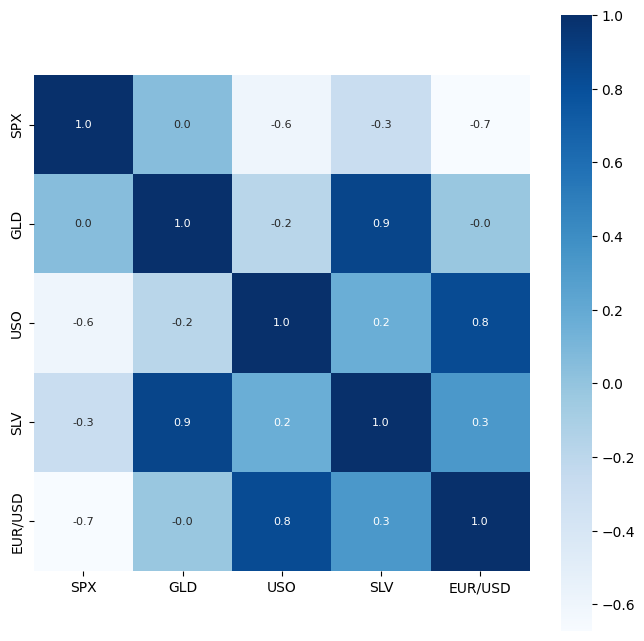

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap= 'Blues')

In [52]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


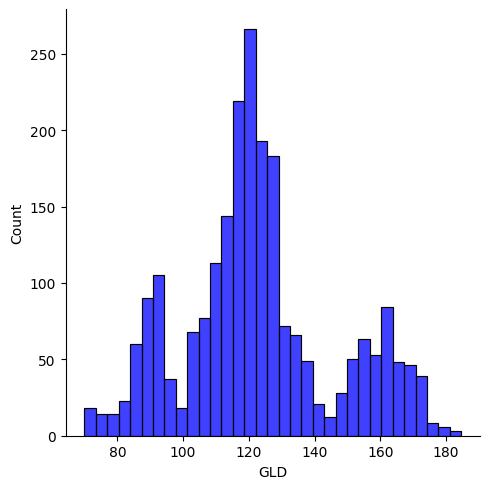

In [57]:
sns.displot(gld_price['GLD'],color='Blue')

In [58]:
X = gld_price.drop(['Date','GLD'],axis=1)
Y = gld_price['GLD']

In [59]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [60]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=2)

In [71]:
regressor = RandomForestRegressor(n_estimators=100)

In [104]:
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)


In [84]:
test_data_prediction = regressor.predict(X_test)

In [85]:
print(test_data_prediction)

[168.65369955  81.76579998 115.96580057 127.59370068 120.75350132
 154.63979765 150.488099   126.11270025 117.6568986  125.84750059
 116.62870136 171.6044011  141.60319901 167.97269863 115.1638
 117.35510064 138.19640337 170.22220097 159.39930335 158.05019934
 155.11310041 125.23180041 175.81139994 157.18900363 125.18270056
  94.11189992  77.82320027 120.27110017 119.11499959 167.54169888
  88.20370071 125.4361006   91.22890089 117.72990027 121.18279958
 136.05590139 115.42200119 115.38970082 145.9863005  107.36670066
 104.41080249  87.31359818 126.46750058 117.89900026 152.18659897
 119.66389987 108.17650044 108.13379831  93.11990045 127.2662972
  74.52800068 113.64389943 121.42190012 111.37459931 118.72509876
 120.88909937 160.59389951 168.21890107 146.87689651  85.9308986
  94.31750029  86.87609882  90.50829991 118.94340065 126.46170089
 127.57310032 169.33670038 122.32529961 117.29049925  98.57430044
 168.37890109 143.16819845 131.95200293 121.09610212 121.69759941
 119.75810029 11

In [87]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9898073056537059


In [90]:
Y_test = list(Y_test)

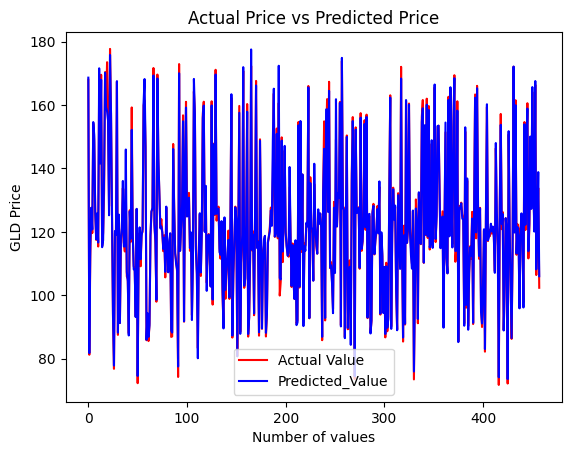

In [103]:
plt.plot(Y_test, color = 'red', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'blue', label = 'Predicted_Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel ('GLD Price')
plt.legend()
plt.show()